In [1]:
import pandas as pd
import numpy as np

In [85]:
from datetime import datetime as dt
from datetime import timedelta
from time import sleep

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Formatting data

In [4]:
def to_date(x):
    try:
        return(dt.strptime(x, '%m/%d/%y'))
    except:
        return(dt.strptime(x, '%m/%d/%Y')) 

In [5]:
def convertToNum(s):
    if s[0] =='<':
        return int(s[1])
    else:
        return int(s)

In [6]:
past5 = pd.read_csv("animePast5Years.csv")
past5["Week"] = past5["Week"].apply(to_date)
past5['My Hero Academia: (United States)'] = past5['My Hero Academia: (United States)'].apply(convertToNum)
past5.head()

,Week,Dragon Ball: (United States),One Piece: (United States),Naruto: (United States),My Hero Academia: (United States),Boruto
0,2015-05-17,14,17,69,1,1
1,2015-05-24,15,17,72,1,1
2,2015-05-31,14,17,74,1,2
3,2015-06-07,17,19,86,1,2
4,2015-06-14,18,16,100,1,2


In [7]:
past5.columns

Index(['Week', 'Dragon Ball: (United States)', 'One Piece: (United States)',
       'Naruto: (United States)', 'My Hero Academia: (United States)',
       'Boruto'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


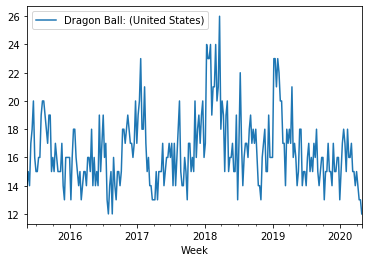

In [8]:
print(past5.plot(kind='line', x="Week", y='Dragon Ball: (United States)'))

## Core Classes (stock to be traded)

#### Anime

In [9]:
class Anime:
    def __init__(self, name, popular):
        self.title = name
        self.popularity = popular
        self.stock = 1000
    def getValue(self, date):
        return(self.popularity[date])
    def __str__(self):
        return self.title

In [10]:
def createAnime(name):
    s = past5[name]
    s.index= past5['Week']
    return Anime(name.split(":")[0], s)

In [11]:
DBZ = createAnime('Dragon Ball: (United States)')
Naruto = createAnime('Naruto: (United States)')
OnePiece = createAnime('One Piece: (United States)')
MHA = createAnime('My Hero Academia: (United States)')
Boruto = createAnime('Boruto')

In [12]:
anime_list = [DBZ, Naruto, OnePiece, MHA, Boruto]

In [13]:
DBZ.popularity

Week
2015-05-17    14
2015-05-24    15
2015-05-31    14
2015-06-07    17
2015-06-14    18
              ..
2020-04-05    15
2020-04-12    14
2020-04-19    13
2020-04-26    13
2020-05-03    12
Name: Dragon Ball: (United States), Length: 260, dtype: int64

In [14]:
DBZ.getValue('4/5/20')

15

#### Player

In [64]:
class Player:
    def __init__(self, vc=150):
        self.balance = vc
        self.portfolio = {} # anime object: value
        self.purchase_history = {} # anime: list of (num, timestamp)
        
    def printPortfolio(self):
        for anime in self.portfolio:
            print(anime.title + ": " + str(self.portfolio[anime]))
    def printPurchases(self):
        for anime in self.purchase_history:
            print(anime.title + ": " + str(self.purchase_history[anime]))
            print("")
    def buy(self, anime, number, time):
        cost = number * anime.getValue(time)
        if (cost > self.balance):
            print("Not enough Virtual Currency to buy, try less")
            return None
        if(anime not in self.portfolio): # buying new stock
            print(anime.title + " added to portfolio")
            self.portfolio[anime] = number
        else: # has number of shares
            self.portfolio[anime] += number
        self.add_purchase(anime, number, time)
        self.balance -= cost
    
    def add_purchase(self, anime, num, time):
        if anime not in self.purchase_history:
            self.purchase_history[anime] = []
        purchase = (num, time)
        self.purchase_history[anime].append(purchase)
    
    def sell(self, anime, number, time):
        if(anime not in self.portfolio):
            print("You do not own this anime")
            return None
        elif (self.portfolio[anime] < number):
            print("Tried to sell more than owned")
            return None
        self.add_purchase(anime, -1*number, time)
        self.balance += number * anime.getValue(time)
        self.portfolio[anime] -= number  
    
    def get_net_worth(self, time):
        result = self.balance
        for anime in self.portfolio:
            result += self.portfolio[anime] * anime.getValue(time)
        return(result)
    def has_stocks_in_portfolio(self):
        for anime in self.portfolio:
            if(self.portfolio[anime]>0):
                return(True)
        return(False)
        

In [16]:
Time = past5.iloc[0]['Week']
Time

Timestamp('2015-05-17 00:00:00')

In [17]:
p1 = Player(200)
p1.buy(MHA, 4, Time)
p1.printPortfolio()
print(p1.balance)
print(MHA.getValue(Time))

My Hero Academia added to portfolio
My Hero Academia: 4
196
1


## TIME handling

In [18]:
birthday = to_date('02/06/03')
type(birthday)

datetime.datetime

In [19]:
# python implements comparator for datetime objects correctly
l=list(pd.Series(index=past5["Week"])[:'2015-06-14'].index)
l

/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


[Timestamp('2015-05-17 00:00:00'),
 Timestamp('2015-05-24 00:00:00'),
 Timestamp('2015-05-31 00:00:00'),
 Timestamp('2015-06-07 00:00:00'),
 Timestamp('2015-06-14 00:00:00')]

In [20]:
max(l)

Timestamp('2015-06-14 00:00:00')

In [21]:
db=pd.Series(index=past5["Week"])
db['05/17/15'] # ALL work for indexing by date
db['2015/05/17'] 
db['2015-05-17'] 
db[to_date('05/17/15')]

/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


nan

In [22]:
target = '6/3/17'
def get_week_of(target):
    if isinstance(target, str):
        target = to_date(target)
    days = [date for date in past5["Week"] if (date.year==target.year and date.month == target.month and date.day<=target.day)]
    if (len(days)<1): # week in month before, recursively call on last day of previous month
        return get_week_of(target - timedelta(days=target.day)) # prev month
    return(max(days))
    
get_week_of(target)    

Timestamp('2017-05-28 00:00:00')

##  Fast forward in Time, values change

In [23]:
Time += timedelta(days=765)
Time = get_week_of(Time)
Time

Timestamp('2017-06-18 00:00:00')

In [25]:
print(MHA.getValue(Time))
p1.get_net_worth(Time) # value increased by 12, * 4 is $48 profit

13


248

# Visualizations and Matplotlib

In [26]:
db = pd.Series(data=past5['Dragon Ball: (United States)'])
db.index = past5["Week"]
print(db['2015-05-24'])

15


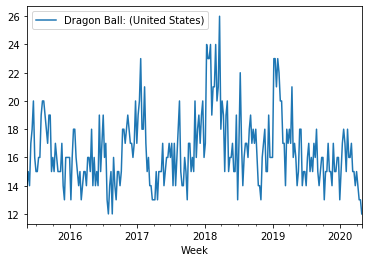

In [27]:
# pandas auto generates matplotlib graph
past5.plot(kind='line', x="Week", y='Dragon Ball: (United States)')

### Matplotlib OOP

In [28]:
import matplotlib.pyplot as plt

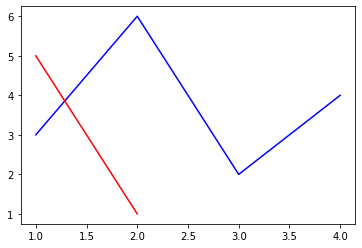

In [29]:
fig = plt.figure() #create object
ax = fig.add_subplot(1,1,1) # only want one figure, and select that

xs = [1,2,3,4]
ys = [3,6,2,4]

ax.plot(xs,ys, color='b')
ax.plot([1,2],[5,1], color='r')
plt.show()

/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """
/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys


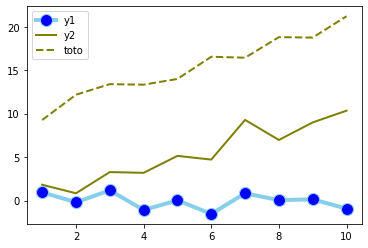

In [30]:
# Markers
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot, using markers
plt.plot('x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot('x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
plt.show()

## stock history leading up to certain date

In [75]:
def getPlotUntil(date, anime):
    # works either by anime class instance, or by name
    target = get_week_of(date)
    ax = anime.popularity[:target].plot(legend=True)
    return ax
   

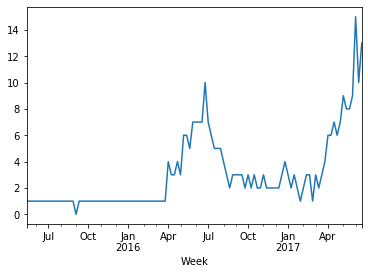

In [32]:
# with time, works same way. Can have multiple plots per graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pop = MHA.popularity[:Time]
ax = pop.plot()
plt.show()

In [80]:
def browse(time):
    for anime in anime_list:
        ax = getPlotUntil(time, anime)
        plt.show()

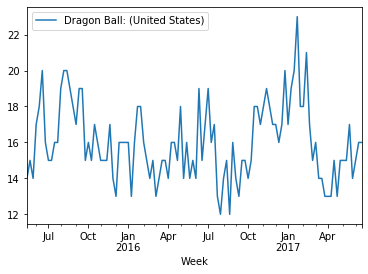

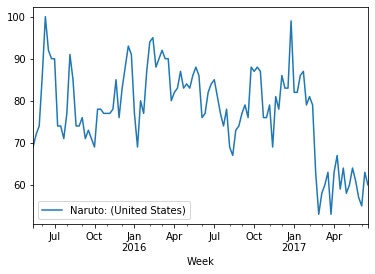

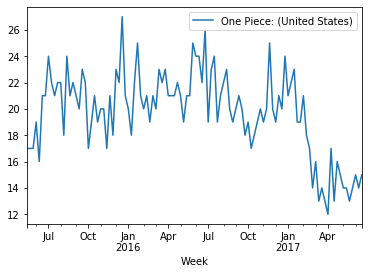

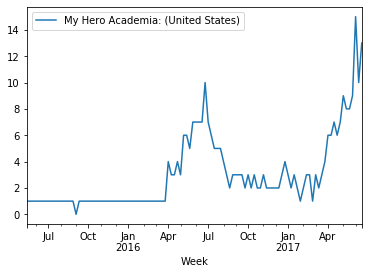

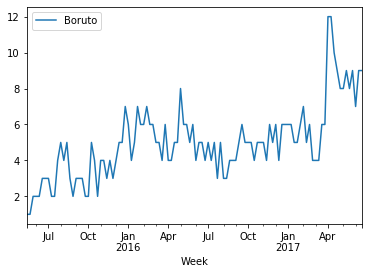

In [81]:
Time = get_week_of('6/18/17')
browse(Time)

## place markers at dates bought

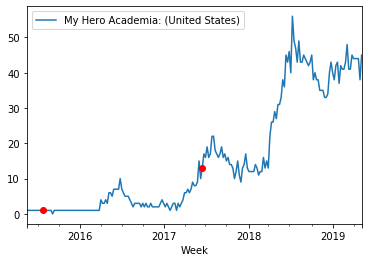

In [37]:
ax = getPlotUntil('5/16/19', MHA)
ax.plot(MHA.popularity.index[10], MHA.popularity[10], 'ro') # by index num
ax.plot(Time, MHA.getValue(Time), color='r', marker='o') # by time
plt.show()

In [38]:
Time = get_week_of(past5.iloc[0]['Week'])
Time

Timestamp('2015-05-17 00:00:00')

###### Make fake purchases to populate purchase history

In [90]:
Time = get_week_of(past5.iloc[0]['Week'])
p1 = Player(200)
p1.buy(MHA, 4, Time)

Time = get_week_of(Time + timedelta(days=45))
p1.buy(Naruto, 2, Time)

Time = get_week_of(Time + timedelta(days=145))
p1.sell(Naruto, 1, Time)
p1.sell(MHA, 2, Time)

Time = get_week_of(Time + timedelta(days=485))
p1.buy(MHA, 3, Time)
p1.buy(DBZ, 2, Time)

My Hero Academia added to portfolio
Naruto added to portfolio
Dragon Ball added to portfolio


In [40]:
purchases = p1.purchase_history
p1.printPurchases()

My Hero Academia: [(4, Timestamp('2015-05-17 00:00:00')), (-2, Timestamp('2015-11-15 00:00:00')), (3, Timestamp('2017-03-12 00:00:00'))]

Naruto: [(2, Timestamp('2015-06-28 00:00:00')), (-1, Timestamp('2015-11-15 00:00:00'))]

Dragon Ball: [(2, Timestamp('2017-03-12 00:00:00'))]



In [97]:
def show_history(player, time): # shows player buying decisions
    time = get_week_of(time)
    for anime in anime_list:
        print(anime.title)
        #print(anime.popularity[:time])  # for debugging purposes
        ax = anime.popularity[:time].plot(legend=True)
        purchases = player.purchase_history
        if anime in purchases:
            for purchase in purchases[anime]: # add markers
                number, time_purchase = purchase # tuple unpacking
                if (number>0): # mark buys in green
                    ax.scatter(time_purchase, anime.getValue(time_purchase), color='g', marker='o', s=160)
                else: # sell is green
                    ax.scatter(time_purchase, anime.getValue(time_purchase), color='r', marker='o', s=160)
        plt.show() # so that all on different axes
        sleep(2) # gives user time to actually look at progress

In [98]:
Time = to_date('6/4/17')
Time

datetime.datetime(2017, 6, 4, 0, 0)

Dragon Ball


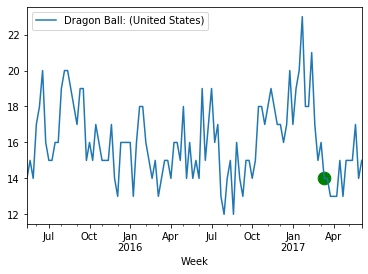

Naruto


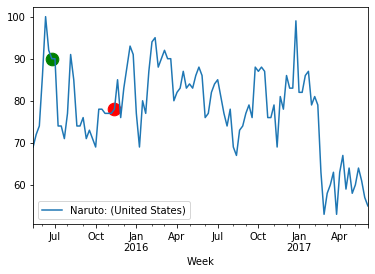

One Piece


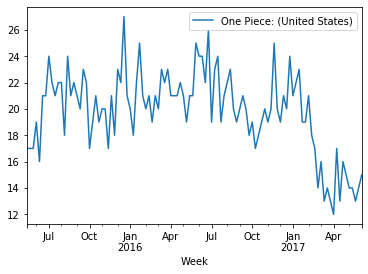

My Hero Academia


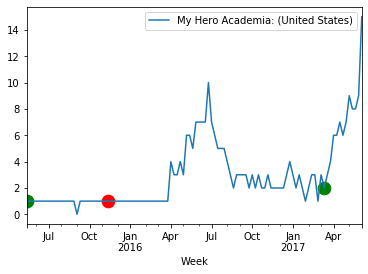

Boruto


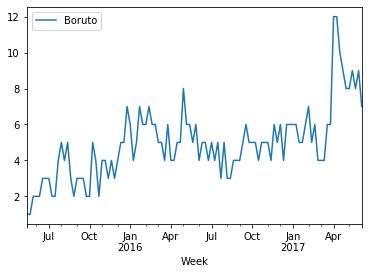

In [99]:
show_history(p1, Time)

# Text Simulation

In [44]:
past5.columns

Index(['Week', 'Dragon Ball: (United States)', 'One Piece: (United States)',
       'Naruto: (United States)', 'My Hero Academia: (United States)',
       'Boruto'],
      dtype='object')

In [45]:
anime_list

In [47]:
for i in anime_list:
    print(i)

Dragon Ball
Naruto
One Piece
My Hero Academia
Boruto


In [48]:
# turns name label abbreviations to actual Anime objects
key_map = {
    'na' : Naruto,
    'my' : MHA, 
    'dr' : DBZ,
    'bo' : Boruto, 
    'on' : OnePiece,
}

In [49]:
print(key_map['na'])

Naruto


In [109]:
def simulate():
    print("Hello, welcome to Anime Stock Market. Here we buy and sell anime. Can you predict what'll make it big?")
    player = Player(300)
    Time = past5.iloc[0]['Week']
    end = past5.iloc[len(past5)-1]["Week"]
    keep_playing=True
    
    # game loop, ends when reach present time
    while(Time<end and keep_playing):
        message = "It is now " +  str(Time.month)+"/"+str(Time.day)+"/"+str(Time.year) + ".\n"
        message += "You have $" + str(player.balance) + " and are worth $" + str(player.get_net_worth(Time)) + ".\n"
        message += "What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) "
        choice = str(input(message))
        
        while (len(choice)>0): # continue while player keeps deciding
            choice=choice[0].lower() # only account for first letter            
            if (choice=='e'): #exit
                keep_playing = False # break outer loop as well
                break
            if (choice=='m'): # put first so player can then choose new action
                show_history(player, Time)
            if (choice=='b'):
                print("Anime available:")
                print("")
                for anime in anime_list:
                    print(anime.title + "- $" + str(anime.getValue(Time)))
                buy_choice = str(input("Which do you choose? (input first two letters) ")).lower()
                
                while (buy_choice not in key_map):
                    buy_choice = str(input("Invalid input. Remember, first two letters) ")).lower()
                print("")
                num = int(input("How many? "))
                player.buy(key_map[buy_choice], num, Time) # player buys stock based on mapping of input to Anime object
            if (choice=='s'):
                if (player.has_stocks_in_portfolio()):
                    for anime in player.portfolio:
                        print(str(anime.title) + ": $" + str(anime.getValue(Time)) + " (" + str(player.portfolio[anime])+")")
                    to_sell = str(input("Which do you want to sell? ")).lower()
                    
                    while (to_sell not in key_map):
                        to_sell = str(input("Invalid input. Remember, first two letters) ")).lower()
                    
                    print("")
                    num = int(input("How many? "))
                    player.sell(key_map[to_sell], num, Time)
                else:
                    print("No stocks to sell")
            if (choice=='t'):
                new_time = input("When do you want to go to? (mm/dd/year) ")
                Time = get_week_of(new_time)
                print("")
                print("")
                break
                
            # ask if want to move on
            
            continu = str(input("You have $" + str(player.balance)+ ". Do you want to do something else before advancing? (y/n) ")).lower()
            if (continu == 'y'):
                choice = str(input("What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) "))
                        
            else: # fast forward a week
                choice = "" # set length to zero so that breaks inner loop
                
        else: # no response, or chose to end turn --> skip to next week
            print("")
            print("")
            Time += timedelta(days=7)
                
    print("You ended up with a profit of $" + str(player.get_net_worth(Time) - 300))

Hello, welcome to Anime Stock Market. Here we buy and sell anime. Can you predict what'll make it big?
It is now 5/17/2015.
You have $300 and are worth $300.
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) t
When do you want to go to? (mm/dd/year) 7/4/15


It is now 6/28/2015.
You have $300 and are worth $300.
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) m
Dragon Ball


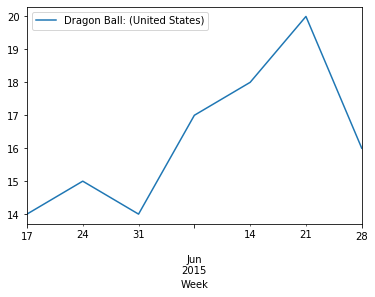

Naruto


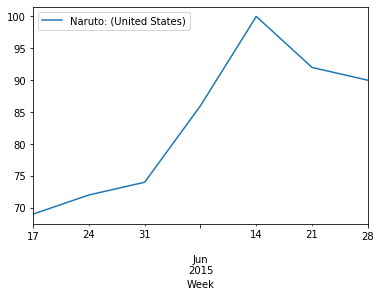

One Piece


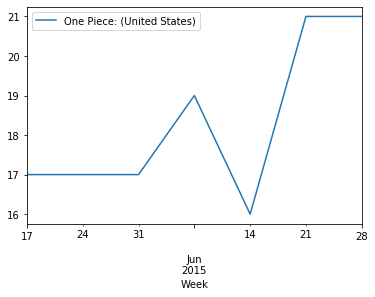

My Hero Academia


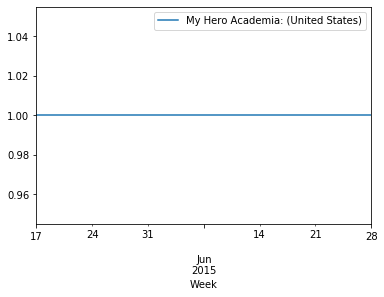

Boruto


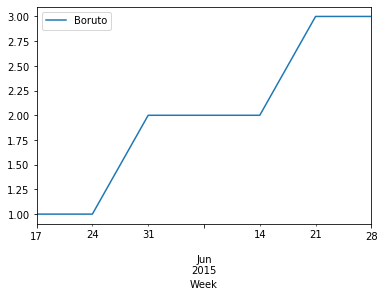

You have $300. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) b
Anime available:

Dragon Ball- $16
Naruto- $90
One Piece- $21
My Hero Academia- $1
Boruto- $3
Which do you choose? (input first two letters) my

How many? 21
My Hero Academia added to portfolio
You have $279. Do you want to do something else before advancing? (y/n) n


It is now 7/5/2015.
You have $279 and are worth $300.
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) b
Anime available:

Dragon Ball- $15
Naruto- $90
One Piece- $24
My Hero Academia- $1
Boruto- $3
Which do you choose? (input first two letters) dr

How many? 5
Dragon Ball added to portfolio
You have $204. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, def

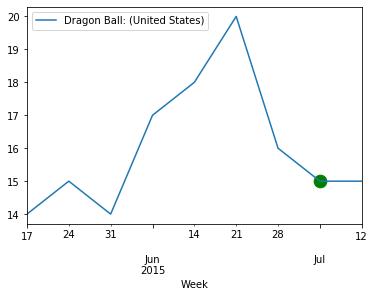

Naruto


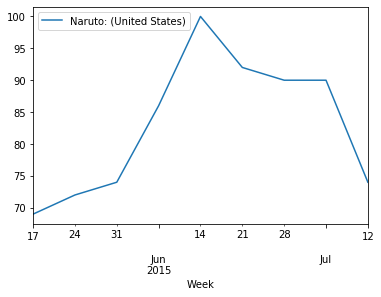

One Piece


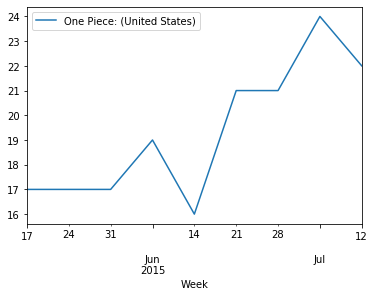

My Hero Academia


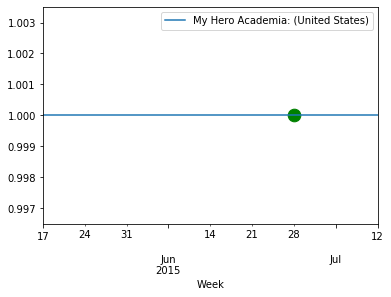

Boruto


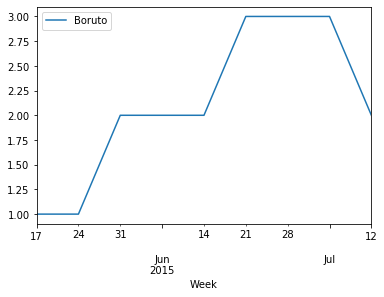

You have $204. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) b
Anime available:

Dragon Ball- $15
Naruto- $74
One Piece- $22
My Hero Academia- $1
Boruto- $2
Which do you choose? (input first two letters) bo

How many? 8
Boruto added to portfolio
You have $188. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) b
Anime available:

Dragon Ball- $15
Naruto- $74
One Piece- $22
My Hero Academia- $1
Boruto- $2
Which do you choose? (input first two letters) na

How many? 1
Naruto added to portfolio
You have $114. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) 


It is now 7/19/2015.
You have $114 and 

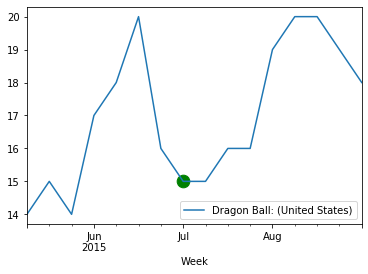

Naruto


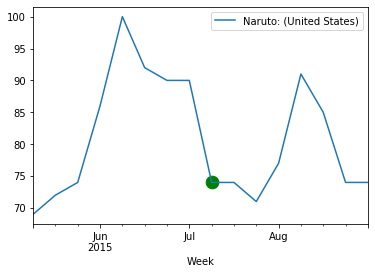

One Piece


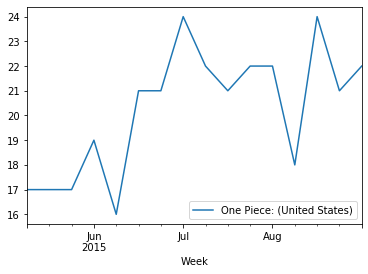

My Hero Academia


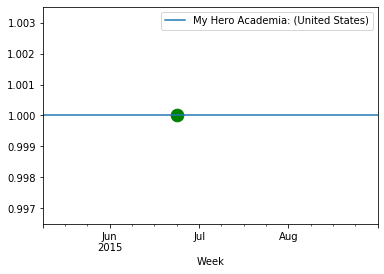

Boruto


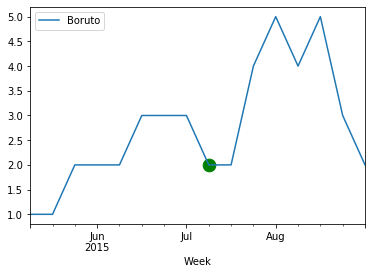

You have $114. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) s
My Hero Academia: $1 (21)
Dragon Ball: $18 (5)
Boruto: $2 (8)
Naruto: $74 (1)
Which do you want to sell? dr

How many? 4
You have $186. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) s
My Hero Academia: $1 (21)
Dragon Ball: $18 (1)
Boruto: $2 (8)
Naruto: $74 (1)
Which do you want to sell? my

How many? 5
You have $191. Do you want to do something else before advancing? (y/n) n


It is now 9/6/2015.
You have $191 and are worth $308.
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) 


It is now 9/13/2015.
You have $191 and are worth $321.
What would you like to do? b=buy, s=sell, m = view m

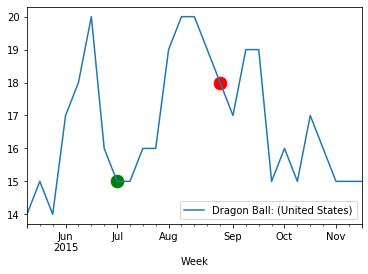

Naruto


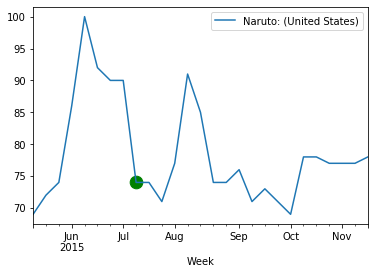

One Piece


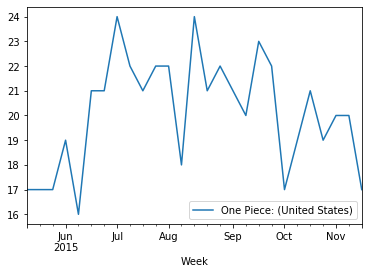

My Hero Academia


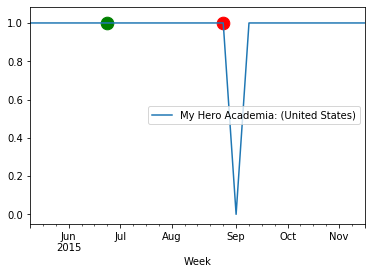

Boruto


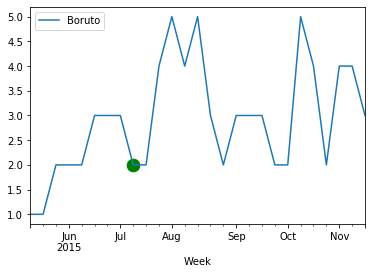

You have $191. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) s
My Hero Academia: $1 (16)
Dragon Ball: $15 (1)
Boruto: $3 (8)
Naruto: $78 (1)
Which do you want to sell? bo

How many? 6
You have $209. Do you want to do something else before advancing? (y/n) y
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) s
My Hero Academia: $1 (16)
Dragon Ball: $15 (1)
Boruto: $3 (2)
Naruto: $78 (1)
Which do you want to sell? na

How many? 1
You have $287. Do you want to do something else before advancing? (y/n) n


It is now 11/22/2015.
You have $287 and are worth $328.
What would you like to do? b=buy, s=sell, m = view market, t=skip ahead in time, e=exit, defaults to move ahead one week) t
When do you want to go to? (mm/dd/year) 6/5/2017


It is now 6/4/2017.
You have $287 and are worth $556.
W

In [111]:
simulate()

# Scratch Work

In [112]:
def browse(time):
    for anime in anime_list:
        print(anime.title)
        fig = getPlotUntil(time, anime)
        plt.show() # so that all on different axes